In [1]:
import gaussianfft
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [15.0, 10.0]

In [2]:
# Constants throughout this notebook
nx, ny, nz = 300, 250, 150
dx, dy, dz = 10, 10, 10
lx = np.arange(0, nx) * dx
ly = np.arange(0, ny) * dy
lz = np.arange(0, nz) * dz
# ---

def sim(a, d):
    v = gaussianfft.variogram('spherical', 3000.0, 250.0, 50, azimuth=a, dip=d)
    field = gaussianfft.simulate(v, nx, dx, ny, dy, nz, dz)
    field_array = np.array(field).reshape((nx, ny, nz), order='F')
    return field_array

In [3]:
use_NED = True  # North-East-Down
def plotx(f):
    plt.contourf(ly,
                 lz,
                 f[int(nx/2), :, :].T,
                 40)
    if use_NED:
        plt.xlabel('East')
        plt.ylabel('Down')
    else:
        plt.xlabel('y')
        plt.ylabel('z')
    
def ploty(f):
    plt.contourf(lx,
                 lz,
                 f[:, int(ny/2), :].T,
                 40)
    if use_NED:
        plt.xlabel('North')
        plt.ylabel('Down')
    else:
        plt.xlabel('x')
        plt.ylabel('z')
    
def plotz(f):
    if use_NED:
        plt.contourf(ly,
                     lx,
                     f[:, :, int(nz/2)],
                     40)
        plt.xlabel('East')
        plt.ylabel('North')
    else:
        plt.contourf(lx,
                     ly,
                     f[:, :, int(nz/2)].T,
                     40)
        plt.xlabel('x')
        plt.ylabel('y')

def complete_plot(f):
    plt.rcParams['figure.figsize'] = [15, 15]
    plt.subplot(311)
    plotx(f)
    plt.gca().set_aspect('equal')
    plt.title('East-slice' if use_NED else 'x-slice')
    plt.subplot(312)
    ploty(f)
    plt.gca().set_aspect('equal')
    plt.title('North-slice' if use_NED else 'y-slice')
    plt.subplot(313)
    plotz(f)
    plt.gca().set_aspect('equal')
    plt.title('Down-slice' if use_NED else 'z-slice')

# Azimuth = 0, Dip = 0

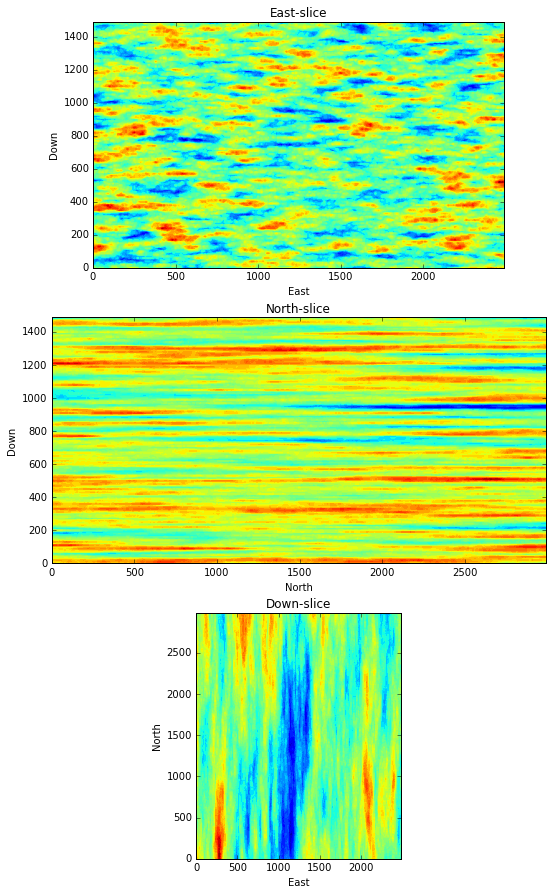

In [4]:
f1 = sim(0, 0)
complete_plot(f1)

# Azimuth = 90, Dip = 0

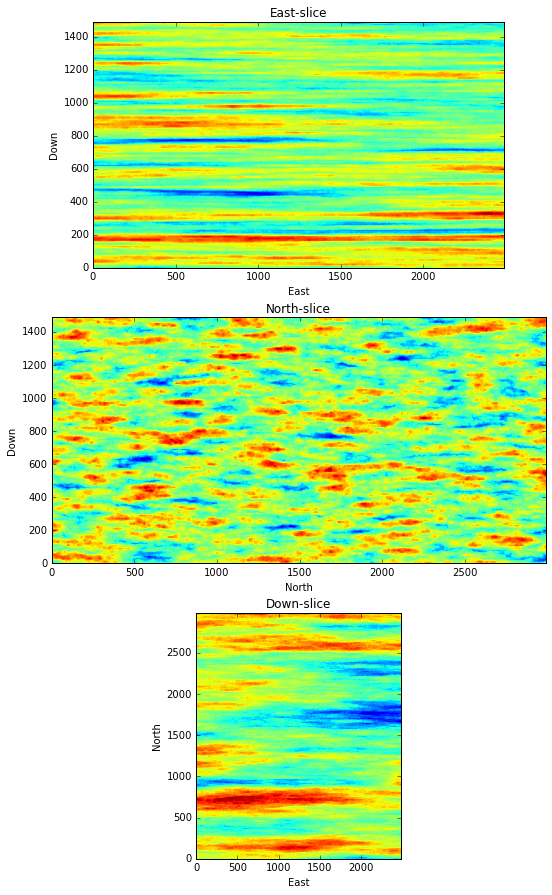

In [5]:
f2 = sim(90, 0)
complete_plot(f2)

# Azimuth = 0, Dip = 30

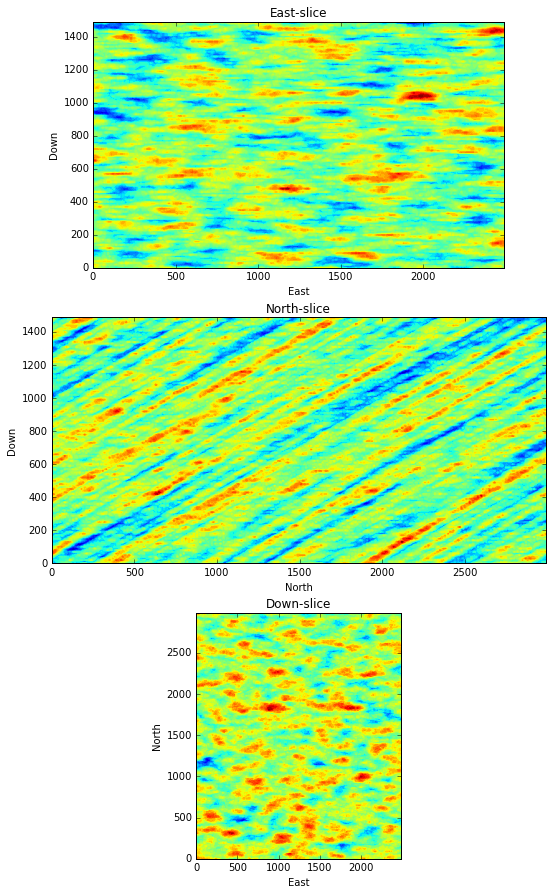

In [6]:
f3 = sim(0, 30)
complete_plot(f3)

# Azimuth = 0, Dip = 90

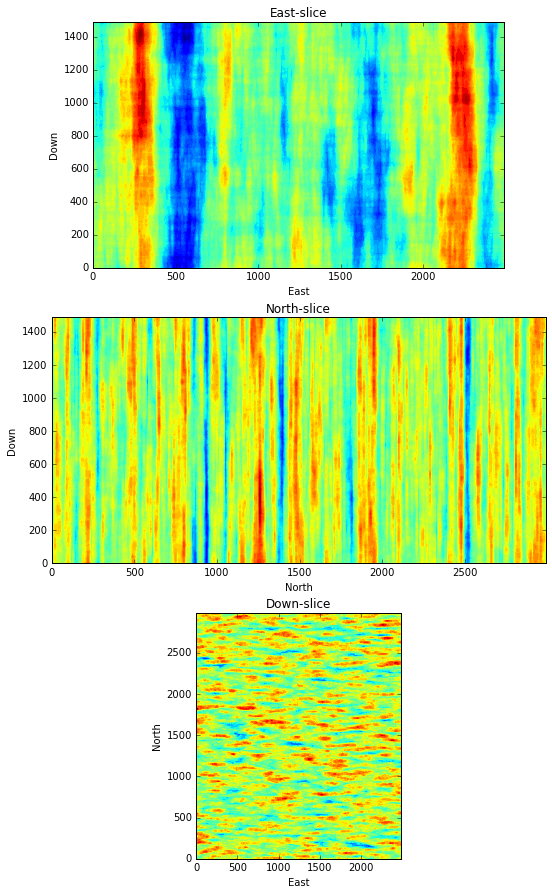

In [7]:
f4 = sim(0, 90)
complete_plot(f4)

# Azimuth = 180, Dip = 30

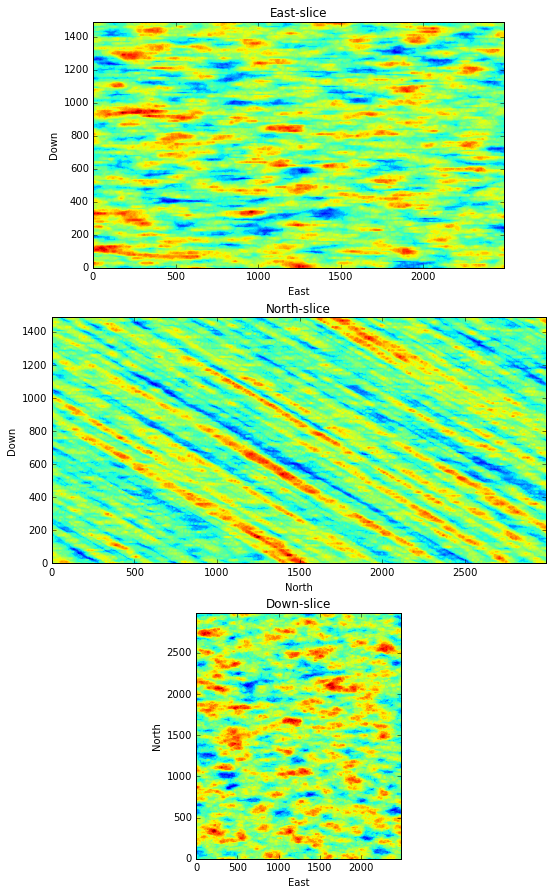

In [8]:
f4 = sim(180, 30)
complete_plot(f4)

# Azimuth = 90, Dip = 30

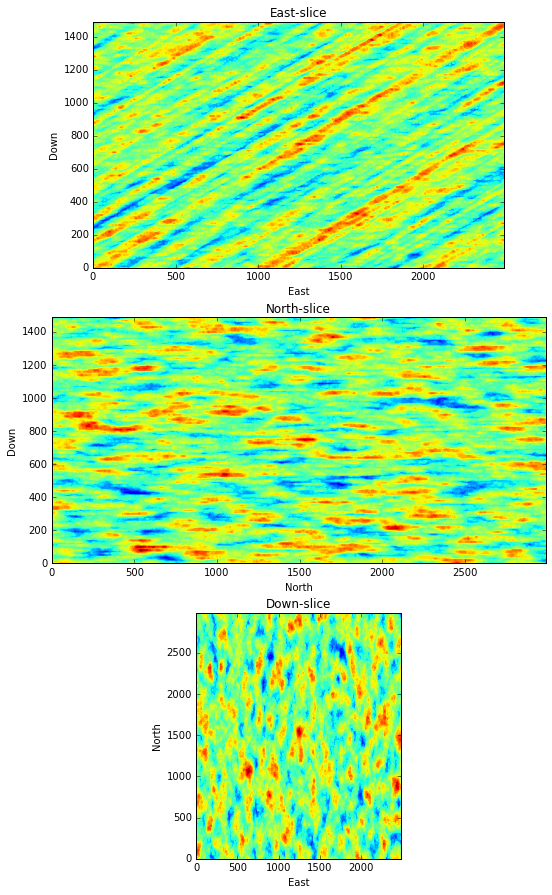

In [9]:
f4 = sim(90, 30)
complete_plot(f4)